# **Prediksi Nilai Customer Lifetime Value (CLV) Perusahaan Asuransi Mobil**

By : Nabila Lailinajma

## **Business Problem Understanding**

Perusahaan Drivesure Insurance, sebuah perusahaan asuransi kendaraan menghadapi tantangan kompleks dalam memahami dan memaksimalkan nilai pelanggannya. Dalam lanskap bisnis yang kompetitif, kemampuan untuk mempertahankan klien loyal menjadi kunci keberhasilan strategis perusahaan.


**Customer Lifetime Value (CLV)** adalah metrik kunci yang mendefinisikan total nilai ekonomi yang diharapkan dari seorang pelanggan sepanjang masa hubungan bisnisnya dengan perusahaan. CLV bukan sekadar angka sederhana, melainkan:

- Prediktor nilai ekonomi masa depan
- Ukuran potensi pendapatan dari seorang pelanggan
- Alat strategis untuk memahami kontribusi pelanggan

**Problem Statement**

Perusahaan asuransi membutuhkan model prediktif untuk mengidentifikasi dan menarik pelanggan dengan Customer Lifetime Value (CLV) tinggi. Tantangan utamanya adalah merancang pendekatan analitis yang dapat akurat memperkirakan potensi kontribusi finansial pelanggan, membedakan mereka yang memberikan keuntungan berkelanjutan, dan mengoptimalkan strategi akuisisi guna memaksimalkan profitabilitas sambil meminimalisasi risiko kerugian.

**Analytic Approach**


Pendekatan analitik akan fokus pada eksplorasi komprehensif dataset untuk mengidentifikasi pola yang membedakan nilai pelanggan. Melalui analisis mendalam dan pengembangan model regresi, proyek bertujuan membangun algoritma prediksi Customer Lifetime Value (CLV) yang akurat, memungkinkan perusahaan asuransi melakukan segmentasi pelanggan secara presisi dan strategis.

**Evaluation Metrics**

Untuk menilai kinerja model prediksi **Customer Lifetime Value (CLV)**, digunakan beberapa metrik evaluasi yang mencerminkan akurasi, stabilitas, serta relevansi terhadap dampak bisnis.

**1. Mean Absolute Error (MAE)**  
MAE mengukur rata-rata kesalahan absolut antara nilai CLV aktual dan prediksi.

\[
MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y_i} |
\]

**Interpretasi:**  
- MAE menunjukkan rata-rata besarnya kesalahan dalam satuan CLV.  
- **Semakin kecil MAE, semakin baik model dalam memprediksi CLV secara akurat.**  

---

**2. Mean Absolute Percentage Error (MAPE)**  
MAPE mengukur rata-rata kesalahan dalam bentuk persentase dari nilai CLV aktual.

\[
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100\%
\]

**Interpretasi:**  
- MAPE menunjukkan **seberapa jauh kesalahan model dalam skala relatif**.  
- **Lebih cocok digunakan jika CLV memiliki skala yang bervariasi**, karena menunjukkan error dalam bentuk persentase.  
- **Semakin kecil MAPE, semakin baik akurasi model.**  

---

**3. R-squared (\( R^2 \))**  
\( R^2 \) mengukur seberapa baik model dapat menjelaskan variasi dalam data CLV.

\[
R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
\]

**Interpretasi:**  
- \( R^2 \) bernilai antara **0 hingga 1**, di mana nilai mendekati **1** menunjukkan model dapat menjelaskan variasi CLV dengan baik.  
- Jika \( R^2 \) mendekati **0**, model tidak mampu menjelaskan variasi CLV secara signifikan.  

---

## **Kesimpulan**  
Dengan kombinasi ketiga metrik ini:  
- **MAE** dan **MAPE** memberikan gambaran tentang tingkat kesalahan prediksi secara absolut dan relatif.  
- **\( R^2 \)** menunjukkan seberapa baik model menjelaskan variasi dalam data CLV.  

Pendekatan ini membantu **DriveSure Insurance** memahami efektivitas model prediktif dalam mengestimasi nilai pelanggan, sehingga dapat digunakan untuk strategi segmentasi dan pengambilan keputusan bisnis yang lebih optimal.


## **Data Understanding**

Data Source : https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ

#### **Feature Information**

Berikut adalah penjelasan mengenai kolom atau fitur-fitur dalam dataset:

| **Feature** | **Description** |
|------------|---------------|
| **Vehicle Class** | Kategori kendaraan yang dimiliki pelanggan |
| **Coverage** | Jenis polis asuransi yang dimiliki pelanggan |
| **Renew Offer Type** | Jenis penawaran pembaruan polis asuransi |
| **Employment Status** | Status pekerjaan pelanggan saat ini |
| **Marital Status** | Status pernikahan pelanggan |
| **Education** | Tingkat pendidikan terakhir yang ditempuh pelanggan |
| **Number of Policies** | Jumlah polis asuransi yang dimiliki pelanggan saat ini |
| **Monthly Premium Auto** | Jumlah premi bulanan yang dibayarkan pelanggan untuk asuransi kendaraan (dalam USD) |
| **Total Claim Amount** | Total nilai klaim yang diajukan pelanggan sejak awal polis |
| **Income** | Pendapatan tahunan pelanggan (dalam USD) |
| **Customer Lifetime Value** | Perkiraan nilai pelanggan berdasarkan durasi dan kontribusi mereka terhadap perusahaan |

#### **Import Libraries**

In [1087]:
# Import Library untuk Analisis
import numpy as np
import pandas as pd
import random
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import spearmanr, kruskal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Preprocessing Data
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
)

# Pembagian & Validasi Data
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    GridSearchCV, RandomizedSearchCV, KFold
)

# Model Machine Learning
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    HuberRegressor, RANSACRegressor, BayesianRidge
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, ExtraTreesRegressor
)

# Metrik Evaluasi Model
from sklearn.metrics import (
   make_scorer, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

# Seleksi Fitur
from sklearn.feature_selection import (
    SelectKBest, f_regression, mutual_info_regression, RFE
)

# Imputasi Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Konfigurasi
warnings.filterwarnings('ignore')

#### **Load Dataset**

In [1090]:
df=pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


#### **Data Information**

In [1093]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['column', 'data type', 'null', 'null pct', 'unique', 'unique sample'],
                     data=listItem)
dfDesc

,column,data type,null,null pct,unique,unique sample
0,Vehicle Class,object,0,0.0,6,"[Sports Car, Four-Door Car]"
1,Coverage,object,0,0.0,3,"[Premium, Extended]"
2,Renew Offer Type,object,0,0.0,4,"[Offer4, Offer3]"
3,EmploymentStatus,object,0,0.0,5,"[Unemployed, Disabled]"
4,Marital Status,object,0,0.0,3,"[Married, Single]"
5,Education,object,0,0.0,5,"[College, Doctor]"
6,Number of Policies,float64,0,0.0,9,"[2.0, 4.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[82.0, 66.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[526.248798, 871.457982]"
9,Income,float64,0,0.0,3625,"[58452.0, 28056.0]"


Dataset terdiri dari **11 kolom**, dengan **5 kolom numerik** (tipe *float64*) dan **6 kolom kategorikal** (tipe *object*). Selain itu, tidak ditemukan nilai yang hilang (*null values*) dalam data. Mari kita cek lagi.

## **Data Cleaning**

#### **Column Correction**

In [1098]:
df.rename(columns={"EmploymentStatus": "Employment Status"}, inplace=True)

Mengubah nama kolom agar konsisten dengan nama kolom lainnya

#### **Handling Missing Value**

In [1102]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
Employment Status          0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dataset terkonfirmasi tidak memiliki null values.

#### **Handling Duplicated Data**

In [1106]:
display(df.duplicated().sum())
display(f"{df.duplicated().sum() / len(df) * 100:.2f}%")

618

'10.90%'

Dari hasil analisis, terdapat 618 baris data duplikat, yang mencakup sekitar 10.9% dari total data. 

Untuk mencegah overfitting saat membangun model, langkah yang diambil adalah menghapus seluruh data duplikat, sehingga dataset menjadi lebih bersih dan akurat dalam analisis.

In [1109]:
df = df.drop_duplicates()

Data duplikat telah berhasil dihilangkan 

#### **Handling Outliers**

<Axes: >

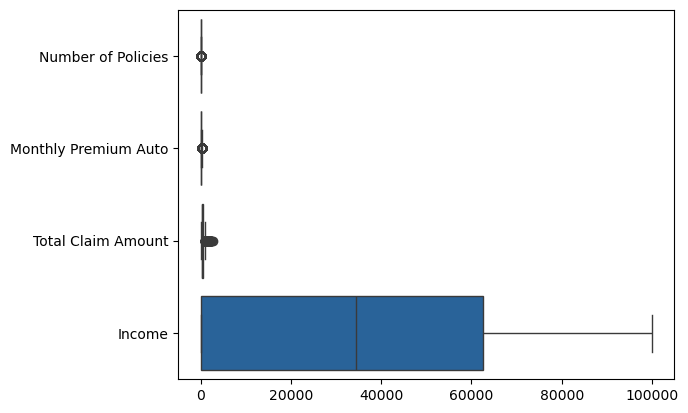

In [1113]:
sns.boxplot(data=df.drop(columns='Customer Lifetime Value'),orient="h", palette="Blues")

Terlihat bahwa terdapat outlier pada kolom Total Claim Amount dan Monthly Premium Auto. Biasanya, penghilangan outlier bertujuan untuk meningkatkan performa model. Namun, karena dataset ini berasal dari industri asuransi, outlier tersebut justru bisa merepresentasikan pelanggan yang berpotensi.

#### **Handling Anomali**

In [1117]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


In [1119]:
df['Income'].value_counts().head()

Income
0.0        1332
28919.0       3
28519.0       3
80590.0       3
79189.0       3
Name: count, dtype: int64

Berdasarkan analisis data, terdapat 1332 klien dengan `Income` = 0. Kemungkinan penyebabnya termasuk klien yang masih dibiayai keluarga, pensiunan tanpa penghasilan tetap, atau pengangguran dengan sumber dana lain. Jadi, kolom ini tidak akan kami tindak.

#### **Define Features and Label**

In [1123]:
X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

#### **Split Data**

In [1126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
df_train = X_train.copy()
df_train['Customer Lifetime Value'] = y_train.values

df_test = X_test.copy()
df_test['Customer Lifetime Value'] = y_test.values

Di sini, kita akan langsung membagi data sebelum melakukan EDA untuk mencegah kebocoran data.

## **Exploratory Data Analysis**

#### **Cek Distribusi Data**

In [869]:
X_train.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income'],
      dtype='object')

In [871]:
num_column= X_train[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]

normality_test_results = {}

for col in num_column:
    shapiro_stat, shapiro_p = stats.shapiro(X_train[col].dropna())
    dagostino_stat, dagostino_p = stats.normaltest(X_train[col].dropna())
    skewness = X_train[col].skew()
    normality_test_results[col] = {
        "Shapiro-Wilk p-value": shapiro_p,
        "D'Agostino p-value": dagostino_p,
        "Skewness": skewness,
        "Skew Direction": "Positive" if skewness > 0 else ("Negative" if skewness < 0 else "None"),
        "Shapiro-Wilk Normal": shapiro_p > 0.05,
        "D'Agostino Normal": dagostino_p > 0.05
    }

normality_results_df = pd.DataFrame(normality_test_results).T

normality_results_df["Normally Distributed"] = normality_results_df["Shapiro-Wilk Normal"] & normality_results_df["D'Agostino Normal"]

normality_results_df

,Shapiro-Wilk p-value,D'Agostino p-value,Skewness,Skew Direction,Shapiro-Wilk Normal,D'Agostino Normal,Normally Distributed
Number of Policies,0.0,0.0,1.252124,Positive,False,False,False
Monthly Premium Auto,0.0,0.0,2.055341,Positive,False,False,False
Total Claim Amount,0.0,0.0,1.626019,Positive,False,False,False
Income,0.0,0.0,0.27908,Positive,False,False,False


Semua data memiliki distribusi yang tidak normal.

#### **Cek Distribusi Kolom Numerikal terhadap CLV**

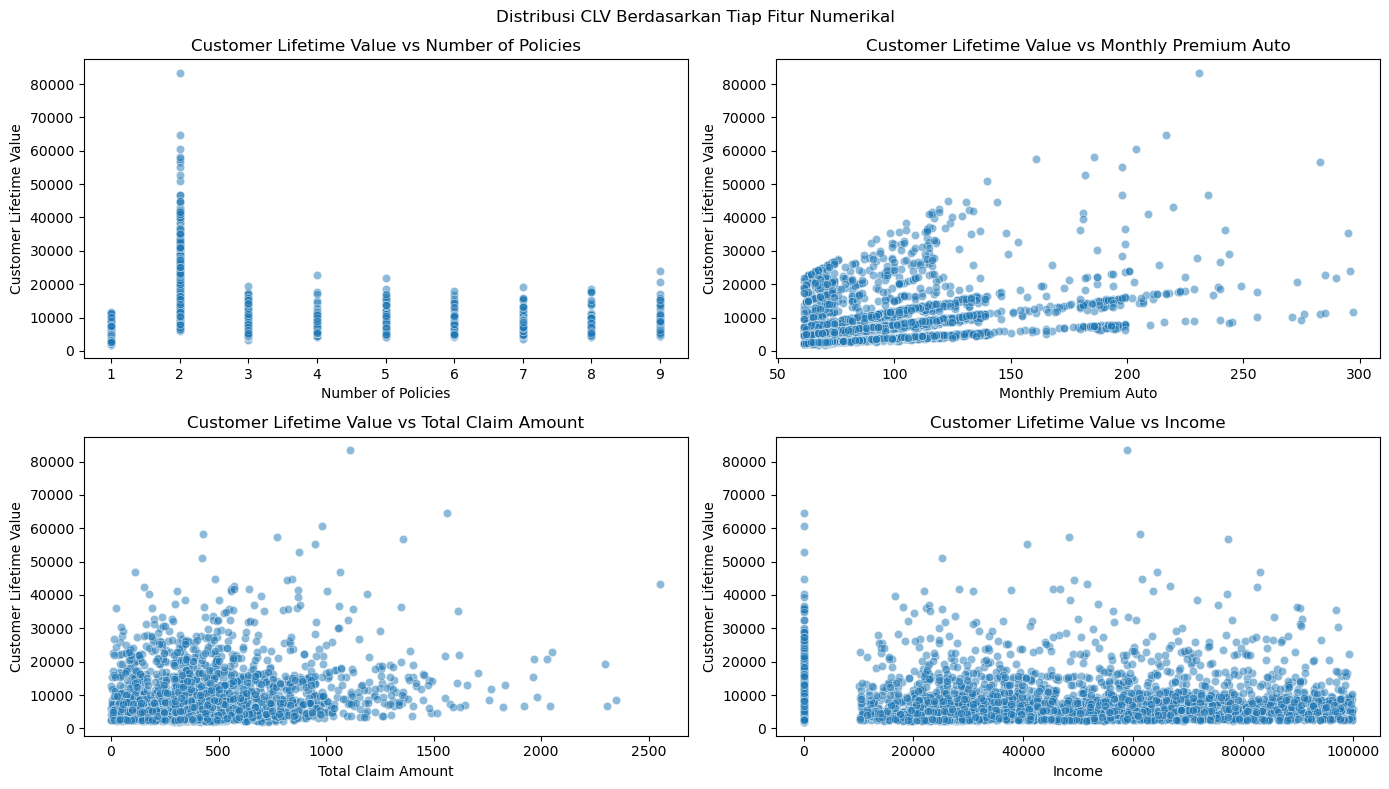

In [875]:
plot_number = 1
plt.figure(figsize=(14, 8))
plt.suptitle('Distribusi CLV Berdasarkan Tiap Fitur Numerikal')

for col in num_column:
    plt.subplot(2, 2, plot_number)
    sns.scatterplot(data=df_train, x=col, y='Customer Lifetime Value', alpha=0.5)
    plt.title(f"Customer Lifetime Value vs {col}")
    plt.tight_layout()
    plot_number += 1

plt.show()

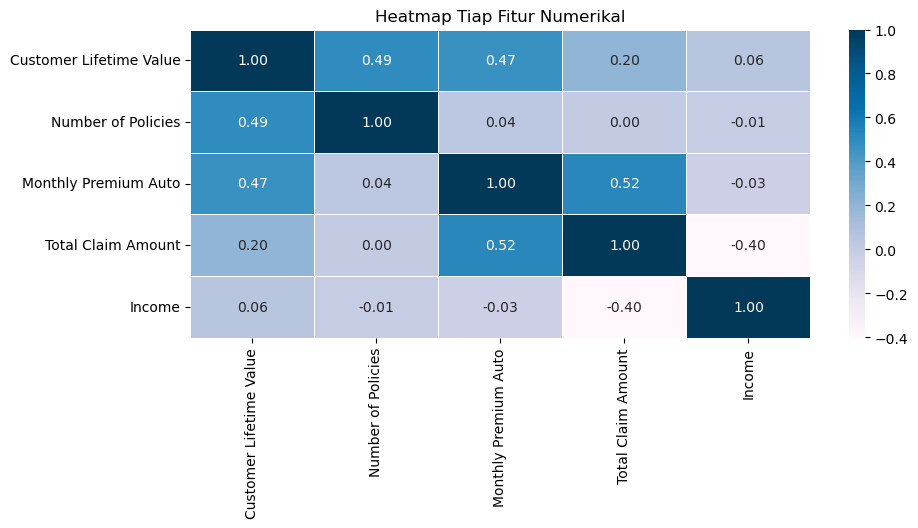

In [876]:
heatmap = df_train[['Customer Lifetime Value', 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]
plt.figure(figsize=(10,4))
sns.heatmap(heatmap.corr(method='spearman'),annot=True, cmap="PuBu", fmt=".2f", linewidths=0.5)
plt.title('Heatmap Tiap Fitur Numerikal')
plt.show()

Berdasarkan grafik scatter plot dan uji korelasi dengan heatmap kolom numerikal terhadap CLV, diperoleh insight bahwa:

**Customer Lifetime Value** memiliki korelasi positif yang cukup kuat dengan **Number of Policies** dan **Monthly Premium Auto**, menunjukkan bahwa pelanggan dengan nilai seumur hidup yang lebih tinggi cenderung memiliki lebih banyak polis dan membayar premi bulanan yang lebih tinggi.

#### **Cek MultiCollinearity Kolom Numerikal**

In [881]:
import statsmodels.api as sm
df_numeric = num_column

df_numeric = sm.add_constant(df_numeric)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif_data)

                Feature        VIF
0                 const  11.514478
1    Number of Policies   1.000961
2  Monthly Premium Auto   1.783690
3    Total Claim Amount   2.041381
4                Income   1.243826


Semua fitur memiliki VIF di bawah 5, jadi tidak ada indikasi multikolinearitas yang signifikan.

#### **Cek Distribusi Kolom Kategorikal terhadap CLV**

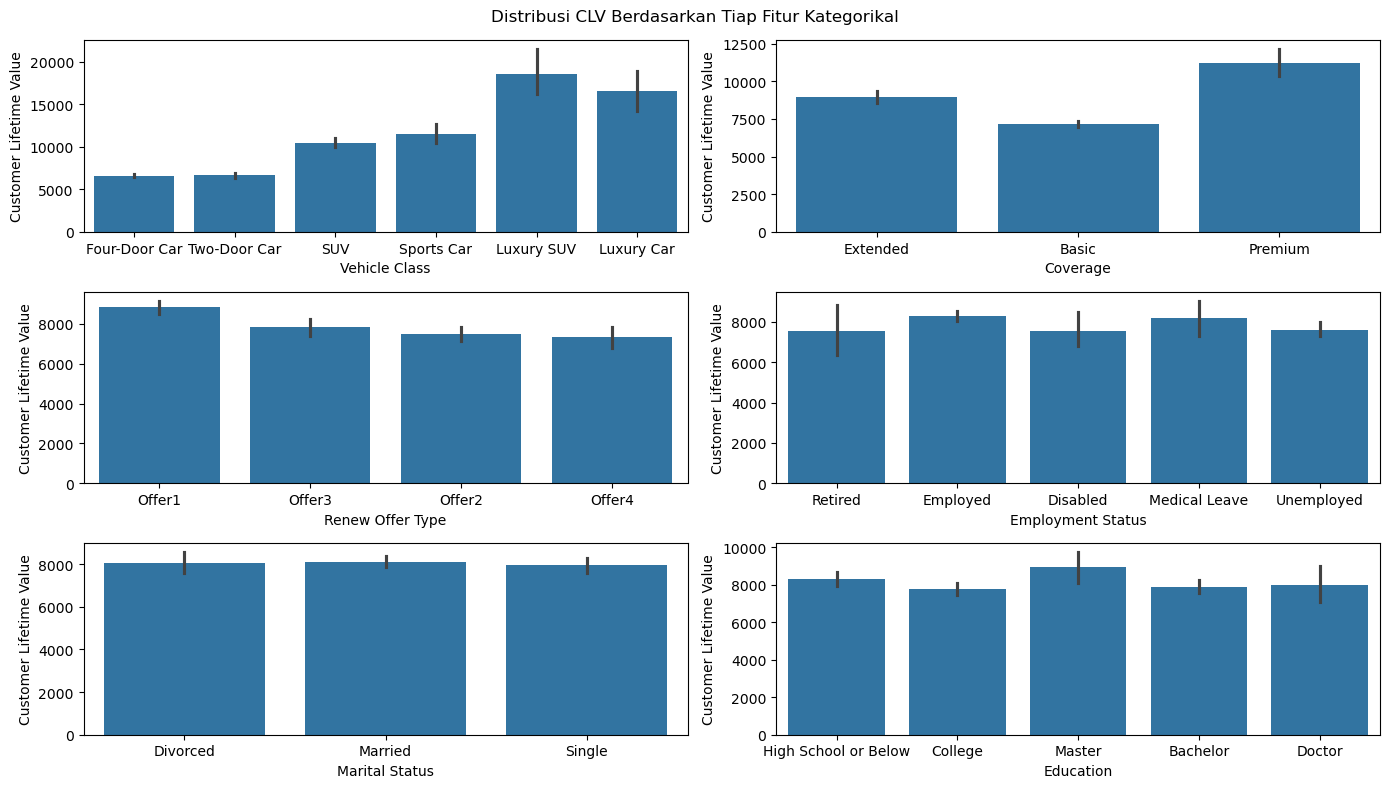

In [885]:
cat_column = X_train[['Vehicle Class','Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Education']]

plt.figure(figsize=(14,8))
plt.suptitle('Distribusi CLV Berdasarkan Tiap Fitur Kategorikal')

for i, kolom in enumerate(cat_column, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x=kolom, y='Customer Lifetime Value', data=df)
    # plt.title(kolom)
    
plt.tight_layout()
plt.show()

In [886]:
vehicle_list = df_train['Vehicle Class'].unique()
groups_vehicle = [df_train[df_train['Vehicle Class'] == cat]['Customer Lifetime Value'] for cat in vehicle_list]

h_stat, p_value = kruskal(*groups_vehicle)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 570.948301667922, P-value: 3.820722627156203e-121


Karena p-value jauh lebih kecil dari 0.05, maka kita bisa menolak H0. ini berarti ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Vehicle Class`

In [890]:
coverage_list = df_train['Coverage'].unique()
groups_coverage = [df_train[df_train['Coverage'] == cat]['Customer Lifetime Value'] for cat in coverage_list]

h_stat, p_value = kruskal(*groups_coverage)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 246.52418305197838, P-value: 2.937337314648411e-54


Karena p-value jauh lebih kecil dari 0.05, maka kita bisa menolak H0. ini berarti ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Coverage`

In [893]:
offer_list = df_train['Renew Offer Type'].unique()
groups_offer = [df_train[df_train['Renew Offer Type'] == cat]['Customer Lifetime Value'] for cat in offer_list]

h_stat, p_value = kruskal(*groups_offer)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 90.90145586599917, P-value: 1.402575770176041e-19


Karena p-value jauh lebih kecil dari 0.05, maka kita bisa menolak H0. ini berarti ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Renew Offer Type`

In [896]:
employment_list = df_train['Employment Status'].unique()
groups_employment = [df_train[df_train['Employment Status'] == cat]['Customer Lifetime Value'] for cat in employment_list]

h_stat, p_value = kruskal(*groups_employment)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 11.240684950591742, P-value: 0.023988148736116197


Karena p-value jauh lebih kecil dari 0.05, maka kita bisa menolak H0. ini berarti ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Employment Status`.

In [899]:
marital_list = df_train['Marital Status'].unique()
groups_marital = [df_train[df_train['Marital Status'] == cat]['Customer Lifetime Value'] for cat in marital_list]

h_stat, p_value = kruskal(*groups_marital)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 1.5727488866786088, P-value: 0.4554932217288884


Karena p-value lebih besar dari 0.05, maka kita gagal menolak H0. ini berarti tidak ditemukan ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Marital Status`

In [902]:
education_list = df_train['Education'].unique()
groups_education = [df_train[df_train['Education'] == cat]['Customer Lifetime Value'] for cat in education_list]

h_stat, p_value = kruskal(*groups_education)
print(f"Kruskal-Wallis Statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 14.33803282123358, P-value: 0.006290794533158399


Karena p-value jauh lebih kecil dari 0.05, maka kita bisa menolak H0. ini berarti ada perbedaan signifikan antara median CLV antar kategori dalam kolom `Education`

## **Data Pre-Processing**

#### **Encoding**

Berikut adalah strategi yang akan kita gunakan untuk menangani setiap jenis fitur:

**Feature Numerikal**

1. Number of Policies → Tidak perlu scaling karena berupa data diskrit dengan rentang nilai yang kecil.

2. Monthly Premium Auto → Scaling Menggunakan MinMaxScaler karena tidak memiliki outlier ekstrem dan rentang data tetap.

3. Total Claim Amount → Scaling Menggunakan RobustScaler karena terdapat outlier yang cukup signifikan.

4. Income → Mengisi nilai nan dengan Iterative Imputer dan Scaling Menggunakan RobustScaler karena terdapat outlier yang cukup signifikan.

**Feature Kategorikal**

5.  Vehicle Class → One Hot Encoding karena unique tidak terlalu banyak dan tidak ada tingkatan.
  
6.  Renew Offer Type → One Hot Encoding karena unique tidak terlalu banyak dan tidak ada tingkatan.
  
7.  Employment Status → One Hot Encoding karena unique tidak terlalu banyak dan tidak ada tingkatan.
  
8.  Coverage → Ordinal Encoding karena unique memiliki tingkatan.
  
9.  Education → Ordinal Encoding karena unique memiliki tingkatan.  

Nilai Income = 0 yang tadi kita anggap sebagai anomali, akan diisi dengan null values. Langkah ini dilakukan untuk memastikan bahwa data lebih akurat dan tidak bias dalam analisis. Pada tahap ini, kita akan mengisi null values tersebut dengan Iterative Imputer agar lebih memperkirakan nilai yang hilang berdasarkan hubungan antar variabel lainnya

In [1129]:
pipe_numeric_robust = Pipeline([
    ('scaler', RobustScaler())
])

pipe_numeric_minmax = Pipeline([
    ('scaler', MinMaxScaler())
])

pipe_cat_onehot = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

coverage_categories = ['Basic', 'Extended', 'Premium']
education_categories = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

pipe_cat_ordinal = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[coverage_categories, education_categories]))
])

transformer = ColumnTransformer(transformers=[,
    ('num_robust', pipe_numeric_robust, ['Total Claim Amount', 'Income']),
    ('num_minmax', pipe_numeric_minmax, ['Monthly Premium Auto']),
    ('cat_onehot', pipe_cat_onehot, ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('cat_ordinal', pipe_cat_ordinal, ['Coverage', 'Education'])],
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['Total Claim Amount', 'Income']),
                                ('num_minmax',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Monthly Premium Auto']),
                                ('cat_onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'Employment Status', 'Marital Status']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Basic',
                                                                              'Extended',
                                                                              'Premium'],
                                                                             ['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctor']]))]),
                                 ['Coverage', 'Education'])])

In [1131]:
transformer.fit(X_train, y_train)
X_train_preprocessed = transformer.transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

## **Metric Evaluation**

Pada tahap ini, kita dapat menentukan model atau algoritma *machine learning* yang paling cocok untuk memprediksi *CLV* berdasarkan *dataset* yang kita punya. Berikut adalah daftar model atau algoritma yang akan kita masukkan kedalam *cross validation*:
- Linear Regression
- Lasso
- Ridge
- Bayesian Ridge
- KNN
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boost
- XGBoost
- Elastic Net
- Huber Regressor

Lalu, metric yang akan kita hitung adalah:
 
- MAE (Mean Absolute Error) dipilih karena memberikan interpretasi yang mudah dipahami, dengan mengukur rata-rata selisih absolut antara nilai prediksi dan aktual tanpa memperhitungkan arah kesalahan. Selain itu, MAE lebih robust terhadap outlier dibandingkan metrik lain.

- MAPE (Mean Absolute Percentage Error) digunakan untuk mengukur kesalahan model dalam bentuk persentase, sehingga lebih intuitif dalam konteks bisnis. MAPE memungkinkan perbandingan performa model di berbagai skala data.

- R² (Koefisien Determinasi) digunakan untuk mengevaluasi seberapa baik model menjelaskan variansi dalam variabel target, dengan nilai R² yang lebih tinggi menunjukkan kecocokan model yang lebih baik dengan data.

In [1134]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Bayesian Ridge": BayesianRidge(),
    "Elastic Net": ElasticNet(),
    "Huber Regressor": HuberRegressor(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [1136]:
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'R-SQUARED' : make_scorer(r2_score)
}

In [163]:
import time

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    start_time = time.time()

    scores = cross_validate(model, X_train_preprocessed, y_train, cv=kf, scoring=scoring, return_train_score=False)

    end_time = time.time()
    elapsed_time = end_time - start_time

    rmse_mean = np.mean(np.sqrt(-scores['test_MAE']**2))

    results.append({
        'Model': name,
        'MAE Mean': -np.mean(scores['test_MAE']),
        'MAE Std': np.std(scores['test_MAE']),
        'MAPE': -np.mean(scores['test_MAPE']),
        'R-SQUARED': np.mean(scores['test_R-SQUARED']),
        'Running Time (s)': elapsed_time
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by=['MAE Mean', 'MAE Std', 'MAPE', 'R-SQUARED', 'Running Time (s)'])
df_results

,Model,MAE Mean,MAE Std,MAPE,R-SQUARED,Running Time (s)
8,Random Forest,1718.970469,98.133061,0.127420,0.643263,3.219583
10,Gradient Boost,1795.749599,85.382428,0.152307,0.674762,1.198035
7,Decision Tree,2095.836573,262.328758,0.154502,0.333472,0.079627
11,XGBoost,2207.963682,113.228524,0.236651,0.603413,0.298516
6,KNN,2571.644879,112.064318,0.269922,0.433126,0.174274
5,Huber Regressor,3448.630897,159.556053,0.365163,0.082277,0.242026
1,Lasso,3893.087978,155.385502,0.597203,0.166283,0.055203
0,Linear Regression,3894.593858,155.183599,0.597109,0.166056,0.037406
2,Ridge,3895.119494,152.925462,0.598012,0.166180,0.011270
3,Bayesian Ridge,3896.807187,153.082923,0.600020,0.165877,0.024415


Dari tabel hasil evaluasi, jika mempertimbangkan MAE Mean, kestabilan (Std), dan R-Squared, model terbaik untuk digunakan adalah:

**1. Random Forest**
- MAE Mean: 1718.97 (terkecil, menunjukkan error rata-rata paling rendah).
- MAE Std: 98.13 (cukup stabil).
- MAPE: 12.74% (terkecil, menunjukkan error relatif rendah).
- R-Squared: 0.643 (model mampu menjelaskan 64.3% variabilitas data).
- Running Time: 3.22 s (cukup tinggi, namun masih wajar untuk model kompleks).

🟢 Alasan dipilih:
**Random Forest menunjukkan performa terbaik secara keseluruhan, dengan MAE dan MAPE paling rendah serta R-squared cukup tinggi, meskipun memiliki waktu komputasi lebih lama.**

**2. Gradient Boosting**
- MAE Mean: 1795.75 (sedikit lebih tinggi dari RF, tetapi masih sangat baik).
- MAE Std: 85.38 (terkecil, paling stabil di antara semua model).
- MAPE: 15.23% (lebih tinggi dari RF, tetapi masih termasuk rendah).
- R-Squared: 0.674 (tertinggi di antara semua model, menunjukkan prediksi yang lebih baik dalam menjelaskan variabilitas data).
- Running Time: 1.19 s (lebih cepat dibandingkan RF).

🟢 Alasan dipilih:
**Gradient Boosting memiliki R-Squared tertinggi, yang berarti lebih baik dalam menjelaskan variabilitas CLV. Meskipun MAE sedikit lebih tinggi dari RF, kestabilan modelnya lebih baik dengan deviasi standar terkecil.**

**3. Decision Tree**
- MAE Mean: 2095.83 (lebih tinggi dari gb).
- MAE Std: 262.32 (sangat besar, paling tidak stabil kedua di antara semua model).
- MAPE: 15.45% (lebih tinggi dari GB, tetapi masih termasuk rendah).
- R-Squared: 0.333 (sangat kecil, hanya menjelaskan sedikit variasi data).
- Running Time: 0.07 s (sangat cepat).

🟢 Alasan dipilih:
**Decision Tree memiliki Running Time tercepat, yang berarti model ini sangat efisien untuk training dan evaluasi, terutama saat menangani dataset besar.**

**4. XGBoost**
- MAE Mean: 2207.96 (lebih tinggi dibandingkan RF, GB, dan DT tetapi masih kompetitif).
- MAE Std: 113.23 (lebih tinggi dari GB, tetapi masih dalam batas wajar).
- MAPE: 33.34% (sangat kecil diantara keempat model).
- R-Squared: 0.603 (sedikit lebih rendah dari RF dan GB, tetapi masih cukup kuat).
- Running Time: 0.29 s (jauh lebih cepat dibandingkan RF dan GB).

🟢 Alasan dipilih:
**XGBoost dipilih karena sering kali dapat memberikan hasil yang lebih baik setelah dilakukan hyperparameter tuning. Meskipun performa awalnya masih di bawah RF dan GB, model ini memiliki fleksibilitas tinggi dan dapat ditingkatkan lebih lanjut.**

### **Hyperparameter Tuning Model Random Forest**

In [1177]:
rf = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('regressor', rf)
])

param_grid = {
    'feature_selection__max_features': [5, 7, 9, None],
    'regressor__n_estimators': [300, 500],
    'regressor__max_depth': [10, 20, 30, 50, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 5],
    'regressor__max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
    'regressor__max_samples': [0.6, 0.7, 0.8, 0.9, None],
    'regressor__min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'regressor__min_impurity_decrease': [0.0, 0.001, 0.005, 0.01],
    'regressor__bootstrap': [True, False],
    'regressor__oob_score': [True, False],
    'regressor__ccp_alpha': [0.0, 0.05, 0.1]
}

randomCV = RandomizedSearchCV(pipeline, param_grid, cv=5, n_iter=200, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=0)

start_time = time.time()
randomCV.fit(X_train, y_train)
end_time = time.time()

fitting_time = end_time - start_time
print(f"\nFitting time: {fitting_time:.2f} seconds")


Fitting time: 220.44 seconds


In [1178]:
randomCV.best_params_

{'regressor__oob_score': False,
 'regressor__n_estimators': 300,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 5,
 'regressor__min_impurity_decrease': 0.01,
 'regressor__max_samples': 0.6,
 'regressor__max_features': None,
 'regressor__max_depth': 30,
 'regressor__ccp_alpha': 0.0,
 'regressor__bootstrap': True,
 'feature_selection__max_features': None}

In [1179]:
randomCV.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_robust',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Total Claim Amount',
                                                   'Income']),
                                                 ('num_minmax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Vehicle Class',
                                                   'Ren...
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Bachelor',
                                                                                               'Master',
                                                                                               'Doctor']]))]),
                                                  ['Coverage', 'Education'])])),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42))),
                ('regressor',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       max_samples=0.6,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=5, n_estimators=300,
                                       random_state=42))])

In [1184]:
best_model = randomCV.best_estimator_

y_pred = best_model.predict(X_test)

In [1188]:
print("Train Results:")
print(f"Train MAE : {-np.mean(cv_results['test_MAE']):.4f}")
print(f"Train MAPE : {-np.mean(cv_results['test_MAPE']):.4f}")
print(f"Train R-SQUARED : {np.mean(cv_results['test_R-SQUARED']):.4f}")

test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nTest Results:")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R-SQUARED: {test_r2:.4f}")

Train Results:
Train MAE : 1659.8378
Train MAPE : 0.1224
Train R-SQUARED : 0.6734

Test Results:
Test MAE: 1657.0811
Test MAPE: 0.1196
Test R-SQUARED: 0.6870


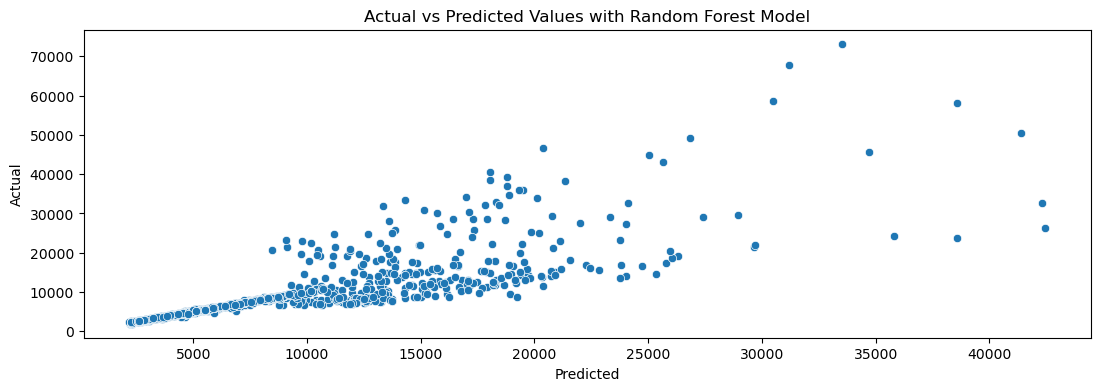

In [1190]:
plt.figure(figsize=(13,4))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Values with Random Forest Model')
plt.show()

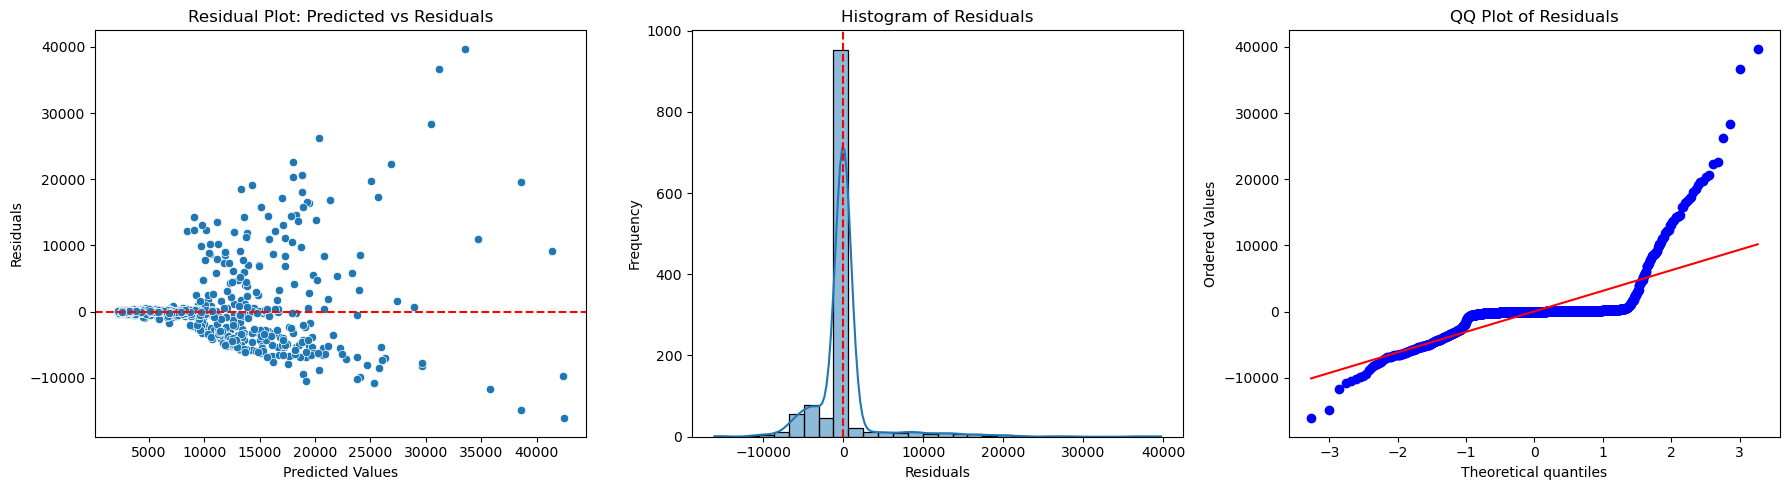

In [1192]:
# Hitung residual
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual Plot: Predicted vs Residuals
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')  # Garis nol
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot: Predicted vs Residuals")

# Histogram dari Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')  # Garis nol
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# QQ Plot (Normal Probability Plot)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

**Kesimpulan Hasil Model Random Forest Setelah Tuning & Analisis Residual**  

**Performa Model**  
- **Train MAE** = **1669.08**, **Test MAE** = **1673.37** → Model cukup **stabil**, tidak terjadi overfitting yang signifikan.  
- **Train MAPE** = **12.48%**, **Test MAPE** = **12.10%** → Model mampu melakukan prediksi dengan **kesalahan relatif rendah** terhadap nilai aktual.  
- **Train R²** = **0.6677**, **Test R²** = **0.6722** → Model menjelaskan sekitar **67% variasi dalam data**, yang cukup baik untuk model regresi.  

**Visualisasi Scatter Plot**  
- Mayoritas titik mengikuti tren **predicted ≈ actual**, tetapi masih terdapat **outlier** yang jauh dari garis ideal (y = x).  
- Beberapa prediksi untuk nilai tinggi (>30.000) lebih tersebar, menunjukkan model masih **kesulitan dalam memprediksi nilai ekstrem**.  

**Analisis Residual**  
- **Residual Plot** → Indikasi **heteroskedastisitas**, di mana error meningkat untuk nilai prediksi besar. Ada beberapa **outlier signifikan** pada prediksi tinggi.  
- **Histogram of Residuals** → Distribusi **tidak normal**, terlihat dari puncak tajam di nol dan skewness. Outlier ekstrem di ekor menunjukkan beberapa prediksi dengan error besar.  
- **QQ Plot** → Residual **tidak sepenuhnya normal**, dengan beberapa outlier jauh dari nilai aktual.  

**Kesimpulan Akhir**  
✅ Model sudah cukup baik dengan **error yang relatif kecil** dan **kemampuan prediksi yang stabil**.  
⚠️ **Masih terdapat outlier dan indikasi heteroskedastisitas**, yang bisa berdampak pada prediksi nilai ekstrem.  

**Secara keseluruhan, model sudah cukup baik, tetapi masih ada ruang untuk peningkatan dalam menangani outlier, distribusi residual, dan prediksi ekstrem.**

### **Hyperparameter Tuning Model Gradient Boosting**

In [288]:
gb = GradientBoostingRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('regressor', gb)
])


param_grid = {
    'feature_selection__max_features': [5, 7, 9, None],
    'regressor__n_estimators': [200, 300, 500],
    'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 10, 20],
    'regressor__min_samples_split': [1, 2, 5],
    'regressor__min_samples_leaf': [3, 5, 8],
    'regressor__max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
    'regressor__min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'regressor__min_impurity_decrease': [0.0, 0.001, 0.005, 0.01],
    'regressor__ccp_alpha': [0.0, 0.05, 0.1],
    'regressor__subsample': [0.9, 1.0, 1.2]
}

randomCV = RandomizedSearchCV(
    pipeline, param_grid, cv=5, n_iter=200, n_jobs=-1, 
    scoring='neg_mean_absolute_error', verbose=0
)

start_time = time.time()
randomCV.fit(X_train_preprocessed, y_train)
end_time = time.time()

fitting_time = end_time - start_time
print(f"\nFitting time: {fitting_time:.2f} seconds")


Fitting time: 211.28 seconds


In [289]:
randomCV.best_params_

{'regressor__subsample': 0.9,
 'regressor__n_estimators': 500,
 'regressor__min_weight_fraction_leaf': 0.01,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 3,
 'regressor__min_impurity_decrease': 0.001,
 'regressor__max_features': None,
 'regressor__max_depth': 10,
 'regressor__learning_rate': 0.01,
 'regressor__ccp_alpha': 0.0,
 'feature_selection__max_features': 7}

In [290]:
randomCV.best_estimator_

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 max_features=7)),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                                           min_impurity_decrease=0.001,
                                           min_samples_leaf=3,
                                           min_weight_fraction_leaf=0.01,
                                           n_estimators=500, random_state=42,
                                           subsample=0.9))])

In [291]:
best_model = randomCV.best_estimator_

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R-SQUARED': 'r2'
}

cv_results = cross_validate(best_model, X_train_preprocessed, y_train, cv=5, scoring=scoring)

y_pred = best_model.predict(X_test_preprocessed)

In [292]:
print("Train Results:")
print(f"Train MAE : {-np.mean(cv_results['test_MAE']):.4f}")
print(f"Train MAPE : {-np.mean(cv_results['test_MAPE']):.4f}")
print(f"Train R-SQUARED : {np.mean(cv_results['test_R-SQUARED']):.4f}")

test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nTest Results:")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R-SQUARED: {test_r2:.4f}")

Train Results:
Train MAE : 1711.0193
Train MAPE : 0.1328
Train R-SQUARED : 0.6701

Test Results:
Test MAE: 1708.1704
Test MAPE: 0.1276
Test R-SQUARED: 0.6811


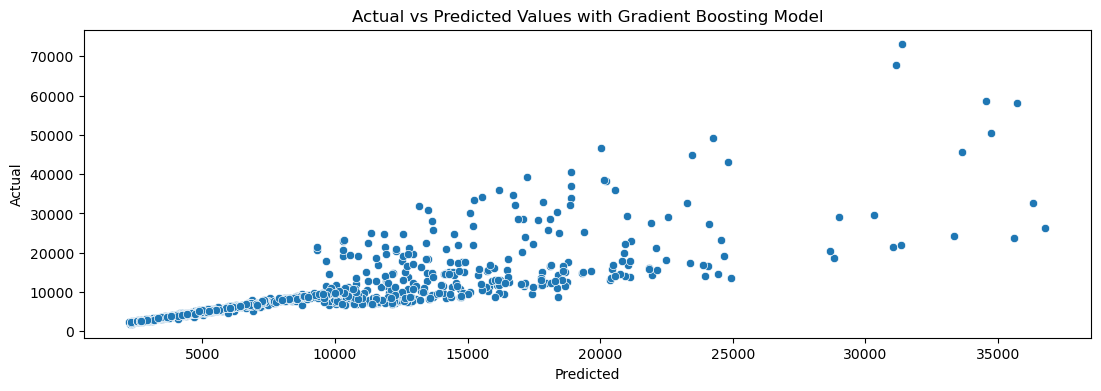

In [293]:
plt.figure(figsize=(13,4))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Values with Gradient Boosting Model')
plt.show()

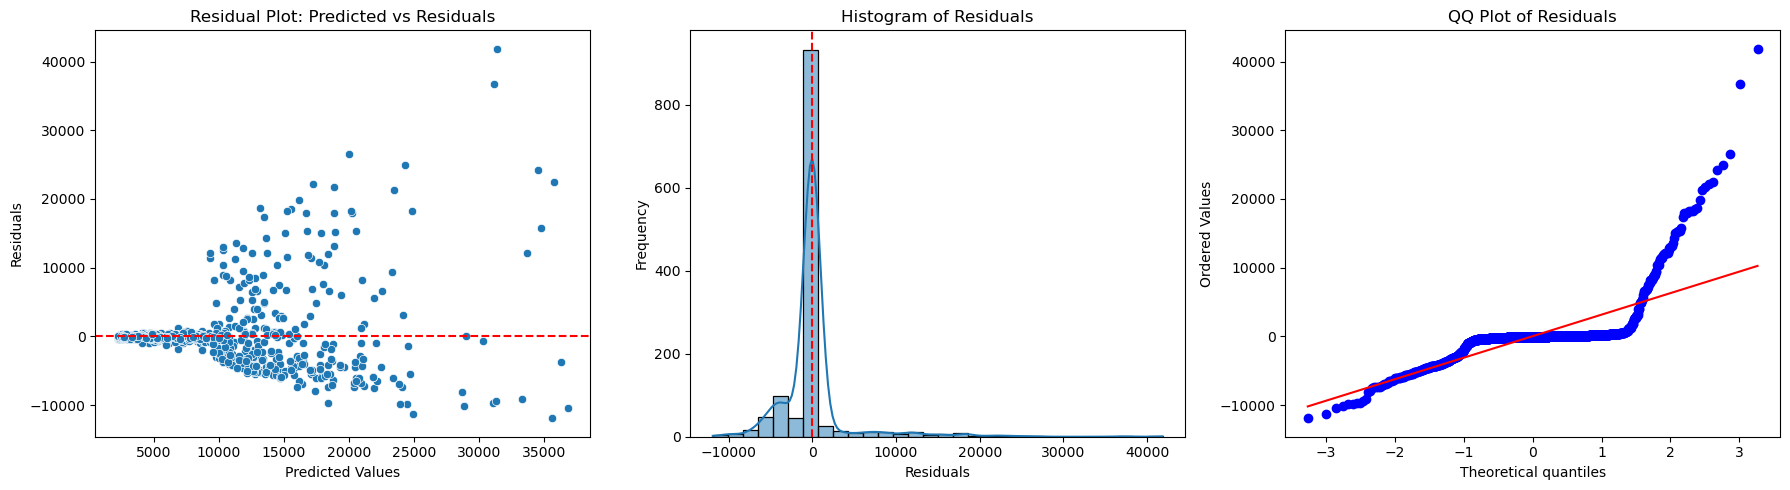

In [294]:
# Hitung residual
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual Plot: Predicted vs Residuals
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')  # Garis nol
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot: Predicted vs Residuals")

# Histogram dari Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')  # Garis nol
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# QQ Plot (Normal Probability Plot)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

**Kesimpulan Hasil Model Gradient Boosting Setelah Tuning & Analisis Residual**   

**Performa Model**:  
   - **Train MAE** = **1711.01**, **Test MAE** = **1708.17** → Model cukup **stabil**, tidak ada overfitting signifikan.  
   - **Train MAPE** = **13.28%**, **Test MAPE** = **12.76%** → Kesalahan relatif cukup rendah terhadap nilai aktual.  
   - **Train R²** = **0.6701**, **Test R²** = **0.6811** → Model dapat menjelaskan sekitar **68% variasi dalam data**.  

**Visualisasi Scatter Plot (Actual vs Predicted)**:  
   - Mayoritas titik mengikuti tren **predicted ≈ actual**, tetapi masih terdapat **outlier** jauh dari garis ideal (y = x).  
   - Nilai prediksi tinggi (> 30.000) lebih tersebar, menunjukkan model masih kesulitan memprediksi nilai ekstrem.  

**Residual Analysis**:  
   - **Residual Plot** → Residual tidak tersebar merata, dengan pola menyebar ke atas untuk nilai prediksi besar, mengindikasikan heteroskedastisitas.  
   - **Histogram of Residuals** → Distribusi residual tidak sepenuhnya normal, terlihat dari puncak tajam di sekitar nol dan adanya skewness.  
   - **QQ Plot of Residuals** → Banyak titik tidak sejajar dengan garis, terutama di ekor atas dan bawah, menunjukkan residual tidak mengikuti distribusi normal.  

**Kesimpulan Akhir**

✅ **Model Gradient Boosting sudah cukup baik** dalam prediksi dengan kesalahan rendah dan performa stabil.  
⚠️ **Namun, masih terdapat outlier dan kesulitan dalam menangani nilai ekstrem**

**Model dapat digunakan, tetapi ada ruang untuk perbaikan dalam menangani residual dan meningkatkan akurasi prediksi pada nilai ekstrem.**

### **Hyperparameter Tuning Model Decision Tree**

In [524]:
dt = DecisionTreeRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('regressor', dt)
])

param_grid = {
    'regressor__max_depth': [3, 5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5, 10],
    'regressor__max_features': ['sqrt', 'log2', None],
    'regressor__ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

randomCV = RandomizedSearchCV(
    pipeline, param_grid, cv=5, n_iter=200, n_jobs=-1, 
    scoring='neg_mean_absolute_error', verbose=0
)

start_time = time.time()
randomCV.fit(X_train_preprocessed, y_train)
end_time = time.time()

fitting_time = end_time - start_time
print(f"\nFitting time: {fitting_time:.2f} seconds")


Fitting time: 132.75 seconds


In [525]:
randomCV.best_params_

{'regressor__min_samples_split': 10,
 'regressor__min_samples_leaf': 10,
 'regressor__max_features': None,
 'regressor__max_depth': 10,
 'regressor__ccp_alpha': 0.01}

In [526]:
randomCV.best_estimator_

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42))),
                ('regressor',
                 DecisionTreeRegressor(ccp_alpha=0.01, max_depth=10,
                                       min_samples_leaf=10,
                                       min_samples_split=10,
                                       random_state=42))])

In [527]:
best_model = randomCV.best_estimator_

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R-SQUARED': 'r2'
}

cv_results = cross_validate(best_model, X_train_preprocessed, y_train, cv=5, scoring=scoring)

y_pred = best_model.predict(X_test_preprocessed)

In [528]:
print("Train Results:")
print(f"Train MAE : {-np.mean(cv_results['test_MAE']):.4f}")
print(f"Train MAPE : {-np.mean(cv_results['test_MAPE']):.4f}")
print(f"Train R-SQUARED : {np.mean(cv_results['test_R-SQUARED']):.4f}")

test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nTest Results:")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R-SQUARED: {test_r2:.4f}")

Train Results:
Train MAE : 1747.7215
Train MAPE : 0.1296
Train R-SQUARED : 0.6146

Test Results:
Test MAE: 1678.5409
Test MAPE: 0.1249
Test R-SQUARED: 0.6691


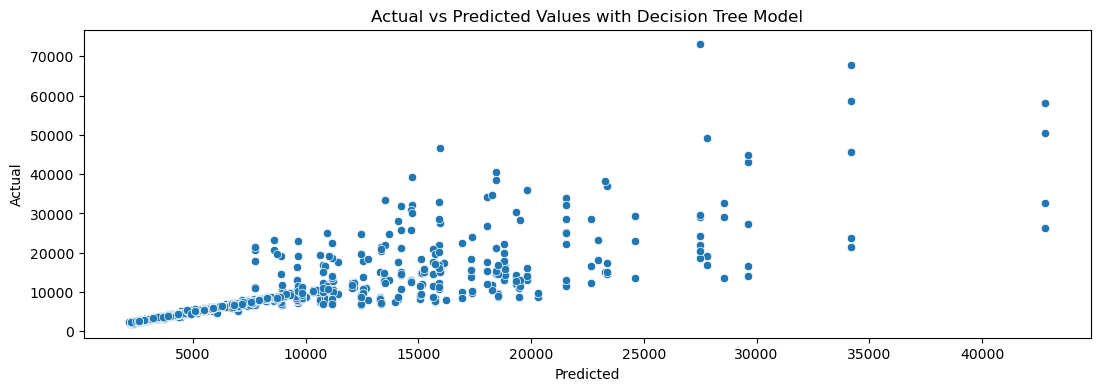

In [541]:
plt.figure(figsize=(13,4))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Values with Decision Tree Model')
plt.show()

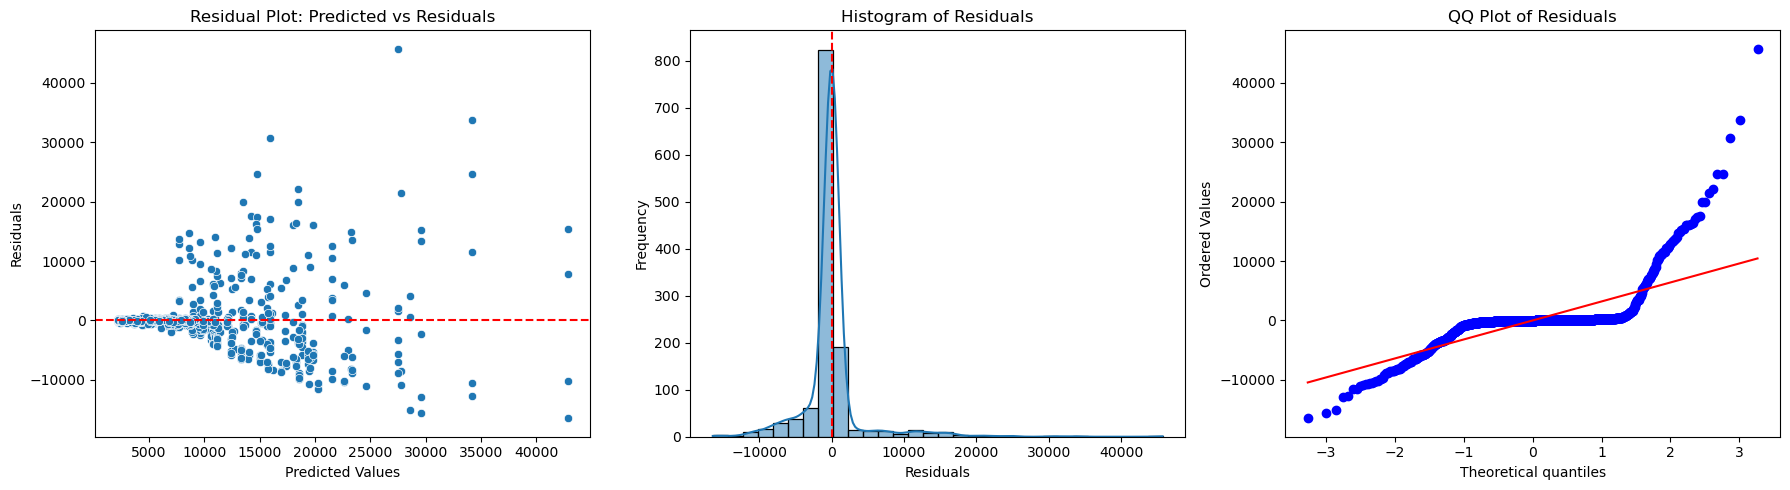

In [530]:
# Hitung residual
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual Plot: Predicted vs Residuals
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')  # Garis nol
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot: Predicted vs Residuals")

# Histogram dari Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')  # Garis nol
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# QQ Plot (Normal Probability Plot)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

**Kesimpulan Hasil Model Decision Tree Setelah Tuning & Analisis Residual**  

**Performa Model**:  
   - **Train MAE** = **1747.72**, **Test MAE** = **1678.54** → Model cukup **stabil**, tidak ada overfitting signifikan.  
   - **Train MAPE** = **12.96%**, **Test MAPE** = **12.49%** → Kesalahan relatif cukup rendah terhadap nilai aktual.  
   - **Train R²** = **0.6146**, **Test R²** = **0.6691** → Model dapat menjelaskan sekitar **66.91% variasi dalam data**.  

**Visualisasi Scatter Plot (Actual vs Predicted)**:  
   - Mayoritas titik mengikuti tren **predicted ≈ actual**, tetapi masih terdapat **outlier** jauh dari garis ideal (y = x).  
   - Nilai prediksi tinggi (> 30.000) lebih tersebar, menunjukkan model masih kesulitan memprediksi nilai ekstrem.  

**Residual Analysis**:  
   - **Residual Plot** → Residual tidak tersebar merata, dengan pola menyebar ke atas untuk nilai prediksi besar, mengindikasikan heteroskedastisitas.  
   - **Histogram of Residuals** → Distribusi residual tidak sepenuhnya normal, terlihat dari puncak tajam di sekitar nol dan adanya skewness.  
   - **QQ Plot of Residuals** → Banyak titik tidak sejajar dengan garis, terutama di ekor atas dan bawah, menunjukkan residual tidak mengikuti distribusi normal.  

**Kesimpulan Akhir**  

✅ **Model Decision Tree sudah cukup baik** dalam prediksi dengan kesalahan rendah dan performa stabil.  
⚠️ **Namun, masih terdapat outlier dan kesulitan dalam menangani nilai ekstrem**  

**Model dapat digunakan, tetapi ada ruang untuk perbaikan dalam menangani residual dan meningkatkan akurasi prediksi pada nilai ekstrem.**

### **Hyperparameter Tuning Model XGBoost**

In [937]:
xgb = XGBRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('regressor', xgb)
])

param_grid = {
    'regressor__n_estimators': [200, 300, 500],
    'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 10, 20],
    'regressor__min_samples_split': [1, 2, 5],
    'regressor__min_samples_leaf': [3, 5, 8],
    'regressor__max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
    'regressor__min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'regressor__min_impurity_decrease': [0.0, 0.001, 0.005, 0.01],
    'regressor__ccp_alpha': [0.0, 0.05, 0.1],
    'regressor__subsample': [0.9, 1.0, 1.2]
}


randomCV = RandomizedSearchCV(
    pipeline, param_grid, cv=5, n_iter=200, n_jobs=-1, 
    scoring='neg_mean_absolute_error', verbose=0
)

start_time = time.time()
randomCV.fit(X_train_preprocessed, y_train)
end_time = time.time()

fitting_time = end_time - start_time
print(f"\nFitting time: {fitting_time:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "ccp_alpha", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "ccp_alpha", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "ccp_alpha", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/pyt


Fitting time: 285.78 seconds


In [938]:
randomCV.best_params_

{'regressor__subsample': 0.9,
 'regressor__n_estimators': 500,
 'regressor__min_weight_fraction_leaf': 0.05,
 'regressor__min_samples_split': 1,
 'regressor__min_samples_leaf': 5,
 'regressor__min_impurity_decrease': 0.01,
 'regressor__max_features': 0.7,
 'regressor__max_depth': 5,
 'regressor__learning_rate': 0.01,
 'regressor__ccp_alpha': 0.0}

In [939]:
randomCV.best_estimator_

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42))),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              ccp_alpha=0.0, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=None,
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=...ne, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_features=0.7, max_leaves=None,
                              min_child_weight=None, min_impurity_decrease=0.01,
                              min_samples_leaf=5, min_samples_split=1,
                              min_weight_fraction_leaf=0.05, missing=nan, ...))])

In [940]:
best_model = randomCV.best_estimator_

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R-SQUARED': 'r2'
}

cv_results = cross_validate(best_model, X_train_preprocessed, y_train, cv=5, scoring=scoring)

y_pred = best_model.predict(X_test_preprocessed)

In [941]:
print("Train Results:")
print(f"Train MAE : {-np.mean(cv_results['test_MAE']):.4f}")
print(f"Train MAPE : {-np.mean(cv_results['test_MAPE']):.4f}")
print(f"Train R-SQUARED : {np.mean(cv_results['test_R-SQUARED']):.4f}")

test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nTest Results:")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R-SQUARED: {test_r2:.4f}")

Train Results:
Train MAE : 1697.2868
Train MAPE : 0.1298
Train R-SQUARED : 0.6656

Test Results:
Test MAE: 1692.1974
Test MAPE: 0.1258
Test R-SQUARED: 0.6790


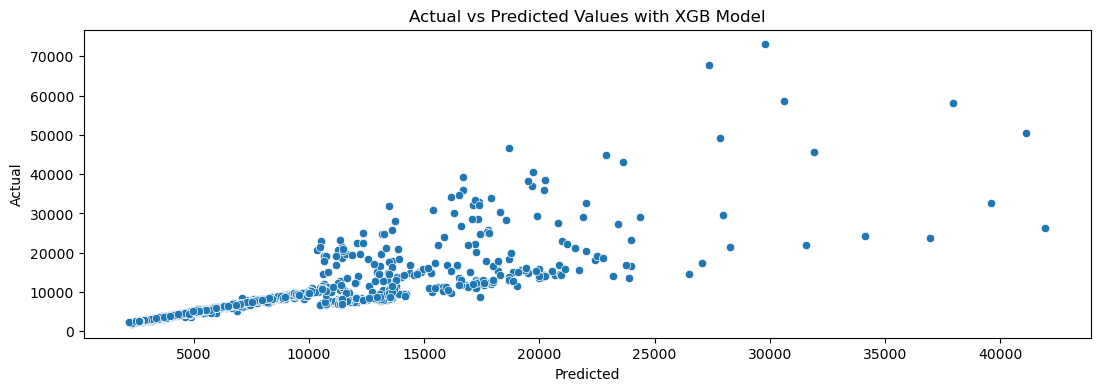

In [942]:
plt.figure(figsize=(13,4))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Values with XGB Model')
plt.show()

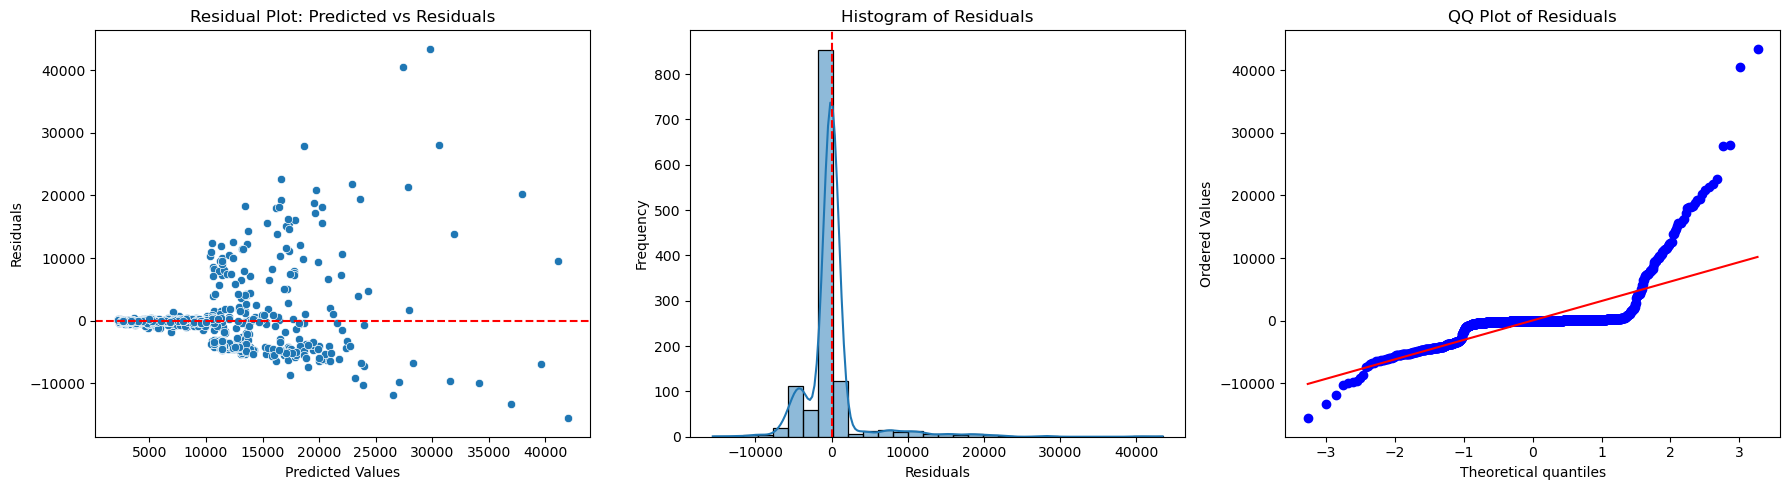

In [943]:
# Hitung residual
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual Plot: Predicted vs Residuals
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')  # Garis nol
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot: Predicted vs Residuals")

# Histogram dari Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')  # Garis nol
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# QQ Plot (Normal Probability Plot)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

**Kesimpulan Hasil Model XGBoost Setelah Tuning & Analisis Residual**  

**Performa Model**:  
   - **Train MAE** = **1697.28**, **Test MAE** = **1692.19** → Model cukup **stabil**, tidak ada overfitting signifikan.  
   - **Train MAPE** = **12.98%**, **Test MAPE** = **12.58%** → Kesalahan relatif cukup rendah terhadap nilai aktual.  
   - **Train R²** = **0.6656**, **Test R²** = **0.6790** → Model dapat menjelaskan sekitar **67% variasi dalam data**.  

**Visualisasi Scatter Plot (Actual vs Predicted)**:  
   - Mayoritas titik mengikuti tren **predicted ≈ actual**, tetapi masih terdapat **outlier** jauh dari garis ideal (y = x).  
   - Nilai prediksi tinggi (> 30.000) lebih tersebar, menunjukkan model masih kesulitan memprediksi nilai ekstrem.  

**Residual Analysis**:  
   - **Residual Plot** → Residual tidak tersebar merata, dengan pola menyebar ke atas untuk nilai prediksi besar, mengindikasikan heteroskedastisitas.  
   - **Histogram of Residuals** → Distribusi residual tidak sepenuhnya normal, terlihat dari puncak tajam di sekitar nol dan adanya skewness.  
   - **QQ Plot of Residuals** → Banyak titik tidak sejajar dengan garis, terutama di ekor atas dan bawah, menunjukkan residual tidak mengikuti distribusi normal.  

**Kesimpulan Akhir**  

✅ **Model XGBoost sudah cukup baik** dalam prediksi dengan kesalahan rendah dan performa stabil.  
⚠️ **Namun, masih terdapat outlier dan kesulitan dalam menangani nilai ekstrem**  

**Model dapat digunakan, tetapi ada ruang untuk perbaikan dalam menangani residual dan meningkatkan akurasi prediksi pada nilai ekstrem.**

### **Ringkasan Performa Model**  
| Model               | Train MAE | Test MAE | Train MAPE | Test MAPE | Train R² | Test R² | Fitting Time |
|---------------------|----------|----------|------------|-----------|----------|---------|--------------|
| **Random Forest**   | 1664.41  | 1675.77  | **12.55%** | **12.18%** | 0.6791   | 0.6790  | **198.84s**  |
| **Gradient Boosting** | 1711.01  | 1708.17  | **13.28%** | **12.76%** | 0.6701   | 0.6811  | **211.28s**  |
| **Decision Tree**   | 1747.72  | 1678.54  | **12.96%** | **12.49%** | 0.6146   | 0.6691  | **132.75s**  |
| **XGBoost**        | 1697.28  | 1692.19  | **12.98%** | **12.58%** | 0.6656   | 0.6790  | **285.78s**  |

Berdasarkan tabel performa model yang diberikan, **Random Forest** adalah model yang paling bagus. Berikut alasannya:

1. **Test MAE (Mean Absolute Error)**: Random Forest memiliki Test MAE terendah (1675.77) dibandingkan dengan model lainnya. Ini menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih kecil pada data uji.

2. **Test MAPE (Mean Absolute Percentage Error)**: Random Forest juga memiliki Test MAPE terendah (12.18%), yang berarti persentase kesalahan prediksi relatif terhadap nilai aktual lebih kecil dibandingkan model lainnya.

3. **Test R² (Koefisien Determinasi)**: Random Forest memiliki Test R² yang cukup tinggi (0.6790), yang menunjukkan bahwa model ini mampu menjelaskan variasi data dengan baik. Meskipun Gradient Boosting memiliki R² yang sedikit lebih tinggi (0.6811), perbedaannya sangat kecil dan tidak signifikan.

4. **Fitting Time**: Random Forest memiliki waktu fitting yang relatif cepat (198.84 detik) dibandingkan dengan XGBoost (285.78 detik), meskipun lebih lambat dari Decision Tree. Namun, kecepatan fitting masih dalam batas yang wajar untuk performa yang lebih baik.

**Kesimpulan**: Random Forest dipilih karena memiliki kesalahan prediksi yang lebih rendah (MAE dan MAPE) dan performa yang stabil antara data training dan testing, dengan waktu fitting yang masih efisien.

In [954]:
#pip install shap==0.41.0

In [ ]:
feature_names_out = []

feature_names_out.extend(['Total Claim Amount', 'Income'])  # Nama fitur tidak berubah

feature_names_out.append('Monthly Premium Auto')  # Nama fitur tidak berubah

onehot_feature_names = transformer.named_transformers_['cat_onehot'].named_steps['onehot'].get_feature_names_out(
    ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']
)
feature_names_out.extend(onehot_feature_names)

ordinal_feature_names = ['Coverage', 'Education']  # Nama fitur tidak berubah
feature_names_out.extend(ordinal_feature_names)

if transformer.remainder == 'passthrough':
    remainder_features = X_train.columns.drop(
        ['Total Claim Amount', 'Income', 'Monthly Premium Auto', 'Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Coverage', 'Education']
    )
    feature_names_out.extend(remainder_features)

print("Feature names after preprocessing:", feature_names_out)

 99%|===================| 3745/3788 [00:25<00:00]        

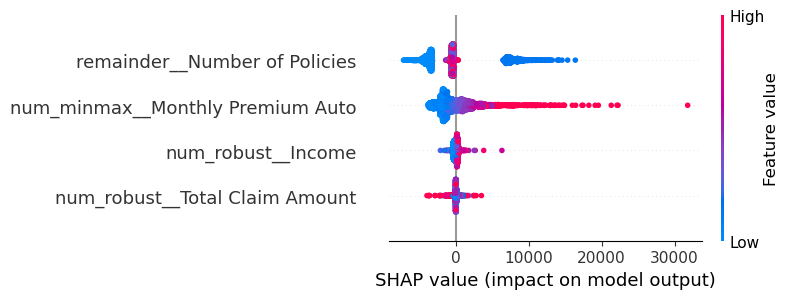

In [1000]:
import shap
feature_names_out = transformer.get_feature_names_out()

# Apply feature selection directly to the training data
X_train_selected = randomCV.best_estimator_.named_steps['feature_selection'].transform(X_train_preprocessed)

# Get the feature names after selection
feature_names = randomCV.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feature_names_out)[feature_names]

# Get feature importance from the best model
best_model = randomCV.best_estimator_.named_steps['regressor']

# Generate SHAP values
explainer = shap.Explainer(best_model, X_train_selected)
shap_values = explainer(X_train_selected)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_selected, feature_names=selected_feature_names)

**Insight**

Plot ini menampilkan empat fitur utama:

**1. `remainder__Number of Policies`:** Fitur ini adalah jumlah polis yang dimiliki oleh nasabah.

- Nilai Tinggi Number of Policies (Merah di Sebelah Kiri): Nilai tinggi dari Number of Policies (misalnya, lebih dari 5 polis) cenderung memiliki dampak negatif terhadap prediksi model (nilai SHAP negatif).

**Ini berarti nasabah dengan banyak polis mungkin kurang menguntungkan bagi perusahaan asuransi.**

- Nilai Sangat Rendah Number of Policies (Biru Terang di Sebelah Kiri):

**Ini berarti nasabah dengan sedikit polis (1 polis) sangat tidak menguntungkan bagi perusahaan.**

- Nilai Cukup Rendah Number of Policies (Biru Gelap di Sebelah Kanan):

**Setelah dilihat dengan detail, warna biru di sebelah kanan lebih berwarna gelap. Ini berarti nasabah dengan sedikit polis (2-4) sangat menguntungkan bagi perusahaan asuransi. Ini sejalan dengan EDA bahwa customer dengan Number of Policies lebih dari 1 tetapi tidak lebih dari 4 atau 5 cenderung memiliki customer lifetime value yang tinggi.**

**2. `num_minmax__Monthly Premium Auto`:** Fitur ini adalah premi bulanan untuk asuransi mobil, yang telah diubah menggunakan MinMaxScaler.

- Nilai Tinggi Monthly Premium Auto (Merah di Sebelah Kanan):

**Ini berarti nasabah dengan premi bulanan yang tinggi cenderung lebih menguntungkan bagi perusahaan asuransi. Mereka membayar lebih banyak untuk perlindungan yang lebih komprehensif, sehingga meningkatkan profitabilitas perusahaan.**

- Nilai Rendah Monthly Premium Auto (Biru di Sebelah Kiri):

**Ini berarti nasabah dengan premi bulanan yang rendah cenderung kurang menguntungkan bagi perusahaan asuransi. Mereka membayar lebih sedikit untuk perlindungan yang lebih dasar, sehingga mengurangi profitabilitas perusahaan.**

- Nilai Sedang Monthly Premium Auto (Biru di Sebelah Kanan dengan Warna Lebih Gelap):

**Setelah dilihat dengan detail, warna biru di sebelah kanan lebih berwarna gelap. Ini berarti nasabah dengan premi bulanan yang sedang (tidak terlalu tinggi atau rendah) cenderung memiliki dampak positif terhadap prediksi model.**

**3. `num_robust__Income`**: Fitur ini adalah pendapatan nasabah, yang telah diubah menggunakan RobustScaler.

- Nilai Tinggi Income (Merah di Sebelah Kanan):

**Ini berarti nasabah dengan pendapatan tinggi cenderung lebih menguntungkan bagi perusahaan asuransi. Mereka memiliki kemampuan finansial yang lebih baik untuk membayar premi yang lebih tinggi atau membeli produk asuransi tambahan, sehingga meningkatkan profitabilitas perusahaan.**

- Nilai Rendah Income (Biru di Sebelah Kiri):

**Ini berarti nasabah dengan pendapatan rendah cenderung kurang menguntungkan bagi perusahaan asuransi. Mereka memiliki kemampuan finansial yang terbatas, sehingga cenderung membayar premi yang lebih rendah atau tidak membeli produk asuransi tambahan.**

**4. `num_robust__Total Claim Amount`**: Fitur ini adalah total klaim yang diajukan oleh nasabah, yang telah diubah menggunakan RobustScaler.

- Nilai Cukup Tinggi Total Claim Amount (Merah terang di Sebelah Kanan):

**Ini berarti nasabah dengan total klaim yang tinggi cenderung lebih menguntungkan bagi perusahaan asuransi.**

- Nilai Rendah Total Claim Amount (Biru di Sebelah Kiri):

**Ini berarti nasabah dengan total klaim yang rendah cenderung kurang menguntungkan bagi perusahaan asuransi.**

- Nilai Sangat Tinggi Total Claim Amount (Merah gelap di Sebelah Kiri):

**Setelah dilihat dengan detail, warna merah di sebelah kiri lebih berwarna gelap. Ini berarti nasabah dengan total klaim yang sangat tinggi cenderung memiliki dampak negatif yang signifikan terhadap prediksi model.**

## **Kesimpulan**

Berdasarkan analisis di atas, nasabah yang paling menguntungkan bagi perusahaan asuransi memiliki karakteristik sebagai berikut:

1. Jumlah Polis: Memiliki 2-4 polis.

2. Premi Bulanan Mobil: Membayar premi bulanan sedang hingga tinggi, dan tidak membayar premi yang terlalu rendah.

3. Income: Memiliki pendapatan sedang hingga tinggi.

4. Total Klaim: Mengajukan total klaim sedang, Tidak mengajukan klaim yang terlalu rendah atau terlalu tinggi.

## **Rekomendasi**
1. Fokus pada Nasabah dengan Karakteristik Menguntungkan:
   - Prioritaskan nasabah dengan 2-4 polis, premi bulanan sedang hingga tinggi, pendapatan sedang hingga tinggi, dan total klaim sedang.
   - Kembangkan program loyalitas atau penawaran khusus untuk mempertahankan dan meningkatkan nilai mereka.

2. Tingkatkan Penawaran untuk Nasabah dengan Potensi Tinggi:
   - Dorong nasabah dengan pendapatan tinggi atau premi bulanan tinggi untuk membeli produk asuransi tambahan (jangan lebih dari 4 polis) atau meningkatkan premi mereka melalui penawaran nilai tambah atau layanan premium.

4. Optimalkan Manajemen Risiko:
    - Untuk nasabah dengan total klaim sangat tinggi, evaluasi risiko yang terkait dan pertimbangkan untuk menyesuaikan premi atau persyaratan polis.

## **Keuntungan Model**

1. **Performa Model**
- Model memiliki kesalahan prediksi rata-rata sekitar 1664-1675 unit (misalnya, dalam konteks klaim asuransi, ini bisa berupa rupiah atau dolar). Ini menunjukkan bahwa model cukup akurat dalam memprediksi nilai target.

- Model memiliki kesalahan persentase rata-rata sekitar 12%, yang berarti prediksi model rata-rata meleset sekitar 12% dari nilai aktual.
- Model mampu menjelaskan sekitar 67.9% variasi dalam data. Ini menunjukkan bahwa model memiliki kemampuan prediksi yang cukup baik, meskipun masih ada ruang untuk perbaikan.

2. **Impact Profit/Bisnis**
- Tanpa Model: Jika perusahaan tidak menggunakan model prediktif, kesalahan dalam estimasi klaim atau premi bisa lebih besar. Misalnya, jika kesalahan rata-rata tanpa model adalah 2000 unit, maka perusahaan mungkin mengalami kerugian yang lebih besar karena ketidakakuratan prediksi.

- Dengan Model: Dengan menggunakan model, kesalahan prediksi berkurang menjadi 1664-1675 unit. Ini berarti model berhasil mengurangi kesalahan prediksi sekitar 16.25% (dari 2000 unit ke 1675 unit).

**Dalam konteks bisnis, pengurangan kesalahan prediksi sebesar 16.25% dapat membantu perusahaan:**
- Mengurangi risiko kerugian akibat ketidakakuratan prediksi.
- Mengoptimalkan alokasi sumber daya (misalnya, premi atau cadangan klaim).
- Meningkatkan kepuasan nasabah dengan memberikan estimasi yang lebih akurat.

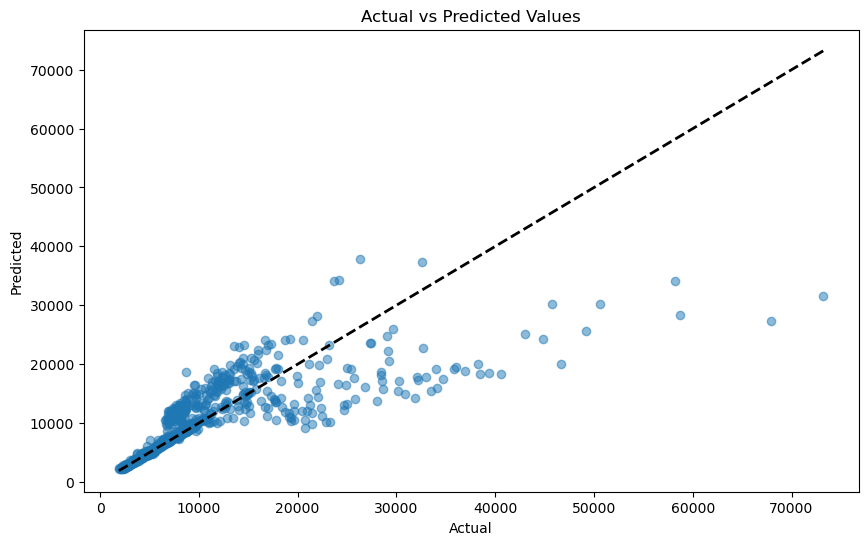

In [1040]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

- Titik-titik yang mendekati garis diagonal menunjukkan prediksi yang akurat.
- Titik-titik yang jauh dari garis diagonal menunjukkan prediksi yang kurang akurat.

**Secara umum, model menunjukkan performa yang baik, tetapi masih ada beberapa outlier yang perlu diperbaiki.**

In [1196]:
best_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_robust',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Total Claim Amount',
                                                   'Income']),
                                                 ('num_minmax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Vehicle Class',
                                                   'Ren...
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Bachelor',
                                                                                               'Master',
                                                                                               'Doctor']]))]),
                                                  ['Coverage', 'Education'])])),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42))),
                ('regressor',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       max_samples=0.6,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=5, n_estimators=300,
                                       random_state=42))])

In [1200]:
# save model
import pickle

with open('best_model_clv.sav', 'wb') as file:
    pickle.dump(best_model, file)

In [1153]:
pd.set_option('display.max_colwidth', None)

columns = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status',
       'Marital Status', 'Education',]
values = []
nunique_list = []
for i in columns:
   value = X_train[i].unique()
   nunique = X_train[i].nunique()
   nunique_list.append(nunique)
   values.append(value)

display(
   pd.DataFrame({
       "columns": columns,
       "values": values,
       "nunique": nunique_list
   })
)

pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,Vehicle Class,"[Four-Door Car, Two-Door Car, SUV, Luxury SUV, Sports Car, Luxury Car]",6
1,Coverage,"[Basic, Extended, Premium]",3
2,Renew Offer Type,"[Offer2, Offer4, Offer1, Offer3]",4
3,Employment Status,"[Employed, Unemployed, Medical Leave, Disabled, Retired]",5
4,Marital Status,"[Married, Divorced, Single]",3
5,Education,"[Bachelor, High School or Below, College, Master, Doctor]",5


In [1204]:
X.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448
std,2.386500,34.335010,293.129102,30691.452111
min,1.000000,61.000000,0.423310,0.000000
25%,1.000000,68.000000,251.776304,0.000000
50%,2.000000,82.000000,374.400000,34322.000000
75%,4.000000,109.000000,548.123122,62471.500000
max,9.000000,297.000000,2759.794354,99934.000000


## **Limitasi Model**

1. Rentang Data:

- Model ini bekerja dengan baik dalam rentang data yang digunakan untuk pelatihan (sesuai dengan describe data).

| Kriteria | Rentang Nilai | Nilai yang Diizinkan |
|----------|---------------|----------------------|
| Vehicle Class (Kelas Kendaraan) | - | Four-Door Car, Two-Door Car, SUV, Luxury SUV, Sports Car, Luxury Car |
| Coverage (Perlindungan) | - | Basic, Extended, Premium |
| Renew Offer Type (Jenis Penawaran Pembaruan) | - | Offer1, Offer2, Offer3, Offer4 |
| Employment Status (Status Pekerjaan) | - | Employed, Unemployed, Medical Leave, Disabled, Retired |
| Marital Status (Status Perkawinan) | - | Married , Divorced , Single |
| Education (Pendidikan) | - | Bachelor, High School or Below, College, Master, Doctor|
| Number of Policies (Jumlah Polis) | 1 - 9 | - |
| Monthly Premium Auto (Premi Bulanan Auto) | 61 - 297 | - |
| Total Claim Amount (Total Jumlah Klaim) | 0.42 - 2552.34 | - |
| Income (Pendapatan) | 0 - 99934 | - |

Jika data baru berada di luar rentang ini, akurasi model mungkin menurun.

2. Kompleksitas Model:

- Model Random Forest cenderung kompleks dan membutuhkan waktu komputasi yang lebih lama, terutama dengan hyperparameter yang banyak. Ini bisa menjadi tantangan jika data semakin besar.

3. Ketergantungan pada Fitur:

- Model sangat bergantung pada fitur yang dipilih. Jika fitur yang relevan tidak dimasukkan, performa model bisa menurun.

4. Overfitting:

- Meskipun model memiliki performa yang baik pada data train dan test, perlu dipastikan bahwa model tidak overfitting dengan melakukan validasi lebih lanjut (misalnya, menggunakan data validasi tambahan).